# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [95]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 617
['waitangi', 'shangri-la', 'paciran', 'port mathurin', 'udachny', 'altai', 'longyearbyen', 'sinabang', 'la passe', 'grytviken', 'viqueque', 'port-aux-francais', 'iqaluit', 'hamilton', 'iskateley', 'mejit', 'monte alegre de sergipe', 'west island', 'blackmans bay', 'khandyga', 'mukah', 'enewetak', 'sarriguren', 'pekanbaru', 'kamaishi', 'tranovaho', 'edinburgh of the seven seas', 'lorengau', 'alo', 'maragogi', 'naze', 'kapuskasing', 'invercargill', 'newman', 'mossel bay', 'anadyr', 'kingston', 'hammerfest', 'sitka', 'uturoa', 'port elizabeth', 'pisco', 'sarina', 'weno', "port saint john's", 'coahuayana de hidalgo', 'baotou', 'kerben', 'taiohae', 'mazara del vallo', 'cabo san lucas', 'vorgashor', 'avarua', 'adamstown', 'tazovsky', 'puerto ayora', 'albany', 'constantia', 'bilibino', 'san antonio de pale', 'manta', 'saynshand', 'ahau', "ma'rib", "mohale's hoek", 'tarija', 'puerto natales', 'bredasdorp', 'hawaiian paradise park', 'mungaa', 'arraial do cabo',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [96]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Define Units
unit = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_test = requests.get(city_url)
        city_weather = city_weather_test.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | shangri-la
City not found. Skipping...
Processing Record 3 of Set 1 | paciran
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | udachny
Processing Record 6 of Set 1 | altai
Processing Record 7 of Set 1 | longyearbyen
Processing Record 8 of Set 1 | sinabang
Processing Record 9 of Set 1 | la passe
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | viqueque
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | mejit
Processing Record 17 of Set 1 | monte alegre de sergipe
Processing Record 18 of Set 1 | west island
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | khandyga
Processing Record 21 of Set 1 | mukah
City not found. Skipping...

In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [98]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,15.46,90,100,4.92,NZ,1684516156
1,paciran,-6.8767,112.3761,24.75,86,91,2.91,ID,1684516156
2,port mathurin,-19.6833,63.4167,25.56,76,7,5.69,MU,1684516156
3,udachny,66.4167,112.4000,4.14,69,91,5.55,RU,1684516157
4,altai,46.3722,96.2583,-1.79,25,27,1.49,MN,1684516157


In [99]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [100]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.46,90,100,4.92,NZ,1684516156
1,paciran,-6.8767,112.3761,24.75,86,91,2.91,ID,1684516156
2,port mathurin,-19.6833,63.4167,25.56,76,7,5.69,MU,1684516156
3,udachny,66.4167,112.4000,4.14,69,91,5.55,RU,1684516157
4,altai,46.3722,96.2583,-1.79,25,27,1.49,MN,1684516157


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

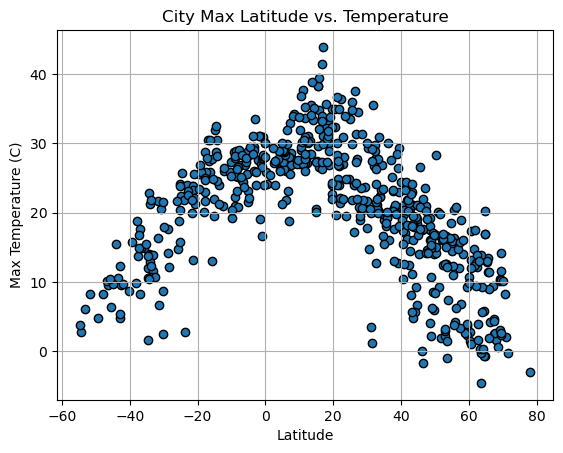

In [101]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitude, temperature, marker="o", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title("City Max Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

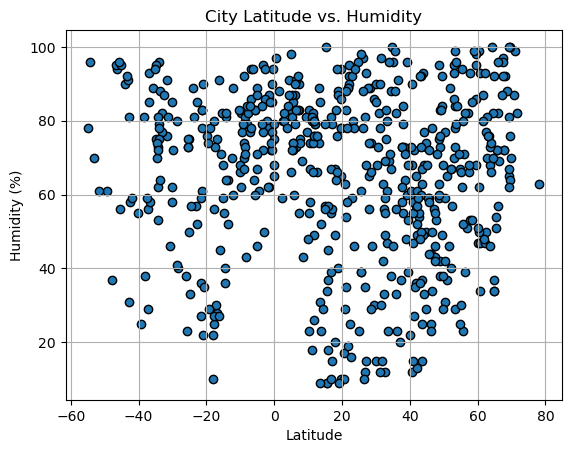

In [102]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude, humidity, marker="o", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

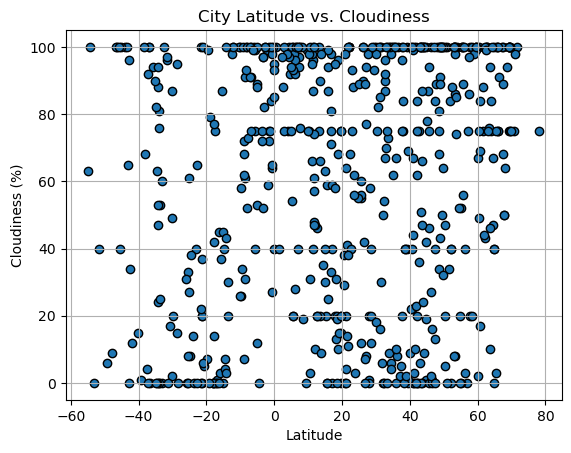

In [103]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, marker="o", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

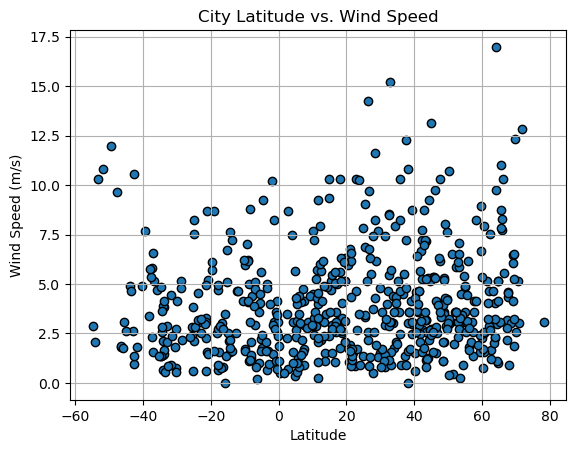

In [104]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude, windspeed, marker="o", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [105]:
# Define a function to create Linear Regression plots
def linregressplot (x,y,z):
    # Perform a linear regression
    pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(x, y)
    # find range of where we can calculate the regression based on the max and min of the weight
    min_x = x.min()
    max_x = x.max()
    loc_x = x.mean()
    loc_y = y.mean()
    regres_values = np.linspace(min_x,max_x,100)
    # Create equation of line to calculate predicted tumor volume
    pe_fit = pe_slope * regres_values + pe_int
    # plot results
    line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
    plt.scatter(x, y)
    plt.plot(regres_values, pe_fit, "--", color='r')
    plt.annotate(line_eq,(loc_x,loc_y-20),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(z)
    plt.show()
    print(f"The r-value is: {pe_r**2}")

In [106]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,udachny,66.4167,112.4000,4.14,69,91,5.55,RU,1684516157
4,altai,46.3722,96.2583,-1.79,25,27,1.49,MN,1684516157
5,longyearbyen,78.2186,15.6401,-3.09,63,75,3.09,SJ,1684516157
6,sinabang,2.4803,96.3801,27.23,80,88,2.25,ID,1684516157
7,la passe,45.5549,-0.8967,21.13,59,46,5.35,FR,1684516158


In [107]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,15.46,90,100,4.92,NZ,1684516156
1,paciran,-6.8767,112.3761,24.75,86,91,2.91,ID,1684516156
2,port mathurin,-19.6833,63.4167,25.56,76,7,5.69,MU,1684516156
8,grytviken,-54.2811,-36.5092,2.78,96,100,2.08,GS,1684516158
9,viqueque,-8.8673,126.3658,22.30,74,68,1.13,TL,1684516158


###  Temperature vs. Latitude Linear Regression Plot

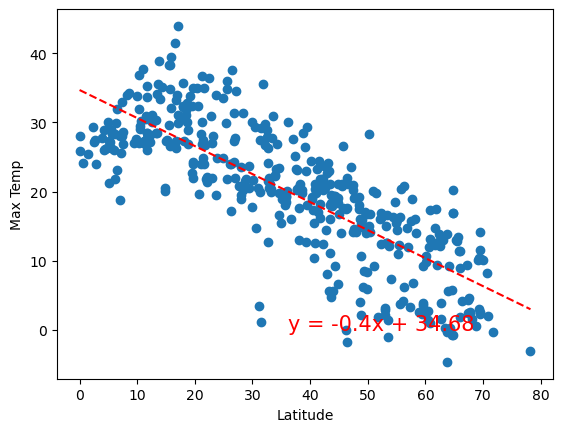

The r-value is: 0.6409408031992758


In [108]:
# Linear regression on Northern Hemisphere
linregressplot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Max Temp")

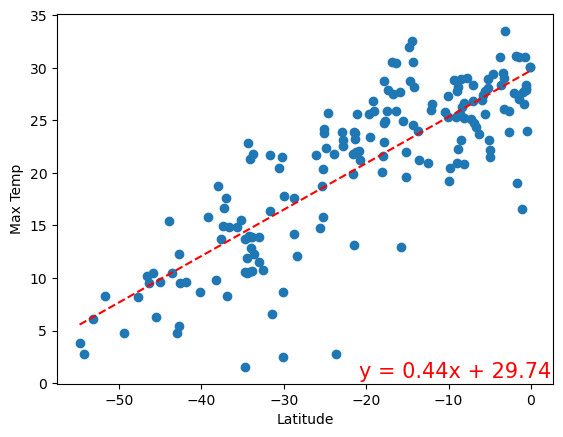

The r-value is: 0.6811680918480686


In [109]:
# Linear regression on Southern Hemisphere
linregressplot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Max Temp")

**Discussion about the linear relationship:** The linear regression is modeling whether or not latitude can be used to accurately predict the maximum temperature. The large r-values show that there is a linear relationship between temperature and latitude. As you approach the equator, the temperature increases. As you get farther away from the equator, the temperature decreases.

### Humidity vs. Latitude Linear Regression Plot

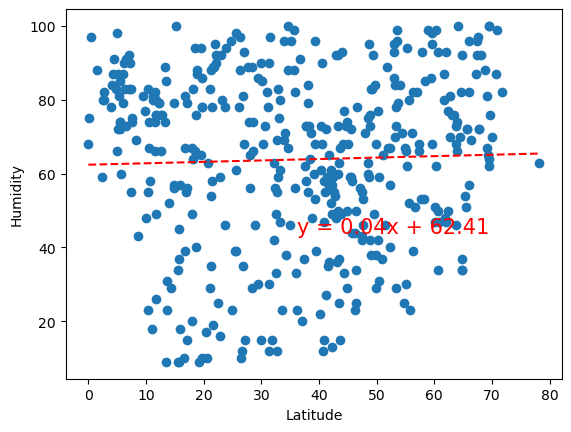

The r-value is: 0.0010124462912226313


In [110]:
# Northern Hemisphere
linregressplot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Humidity")

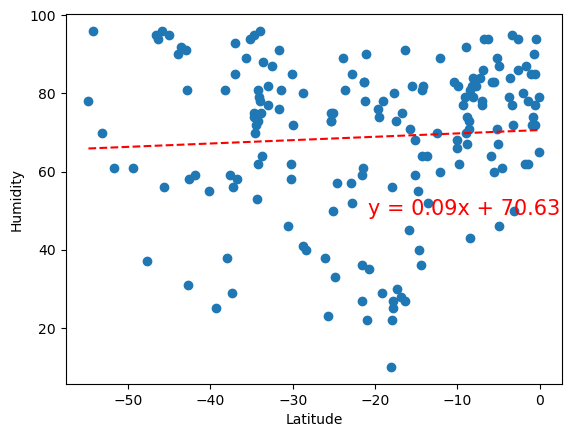

The r-value is: 0.003912440948543556


In [111]:
# Southern Hemisphere
linregressplot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Humidity")

**Discussion about the linear relationship:** The linear regression is modeling whether or not latitude can be used to accurately predict the humidity. The small r-values show that there is no linear relationship between humidity and latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

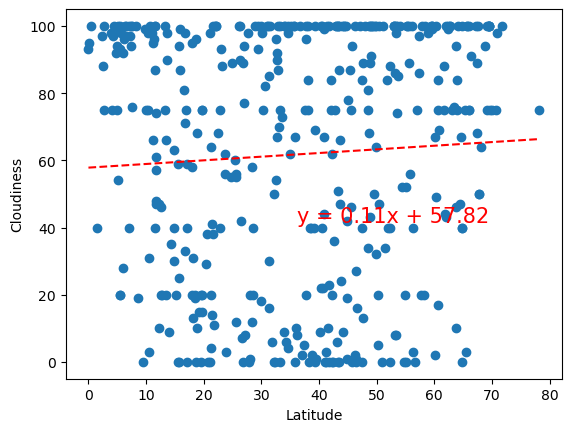

The r-value is: 0.0032869860508905092


In [112]:
# Northern Hemisphere
linregressplot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Cloudiness")

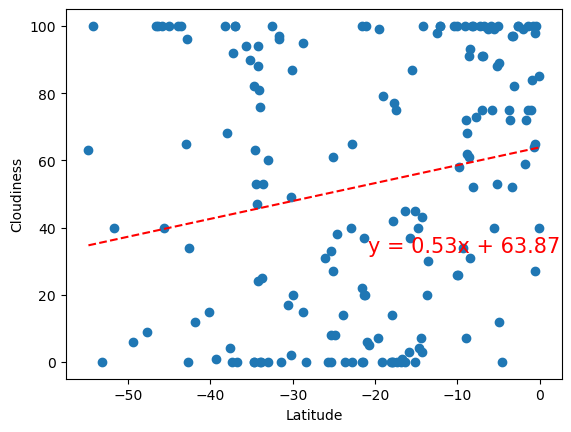

The r-value is: 0.039439572561535526


In [113]:
# Southern Hemisphere
linregressplot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Cloudiness")

**Discussion about the linear relationship:** The linear regression is modeling whether or not latitude can be used to accurately predict the cloudiness. The small r-values show that there is no linear relationship between cloudiness and latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

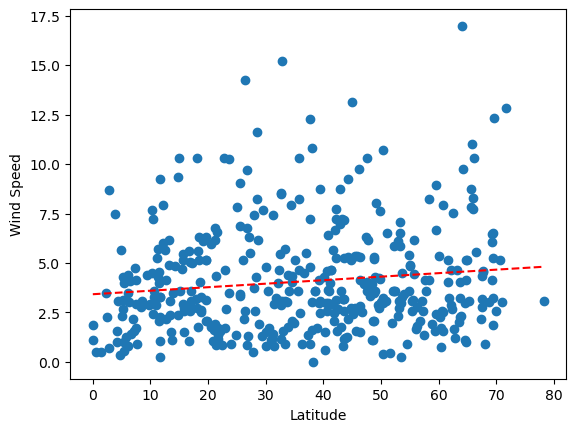

The r-value is: 0.016053424268971887


In [114]:
# Northern Hemisphere
linregressplot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Wind Speed")

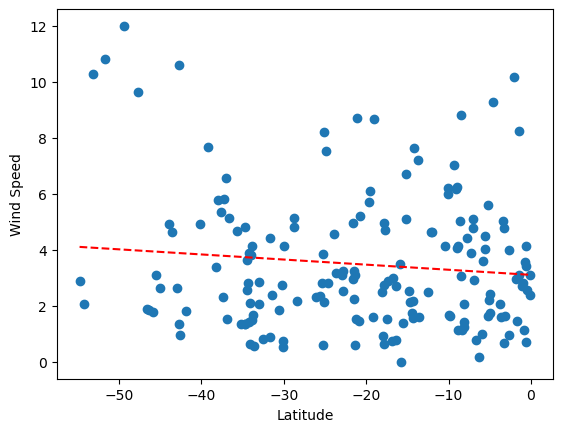

The r-value is: 0.011823613366280888


In [115]:
# Southern Hemisphere
linregressplot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Wind Speed")

**Discussion about the linear relationship:** The linear regression is modeling whether or not latitude can be used to accurately predict the wind speed. The small r-values show that there is no linear relationship between wind speed and latitude. 